## Rodrigo Xavier
## Matrícula 569037

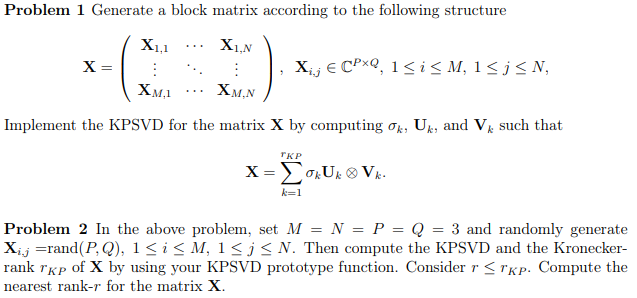

In [29]:
import numpy as np
from scipy.linalg import svd

def kpsvd(X, M, N, P, Q, r=None):
    """
    Perform Kronecker Product Singular Value Decomposition (KPSVD).

    Parameters:
    - X: np.ndarray, the input matrix of shape (M*P, N*Q)
    - M, N: int, dimensions of the first factor
    - P, Q: int, dimensions of the second factor
    - r: int, optional, rank for nearest approximation (default: full rank)

    Returns:
    - U: list of np.ndarray, left singular matrices for each component
    - V: list of np.ndarray, right singular matrices for each component
    - Sigma: list of float, singular values
    """
    # Step 1: Rearrange X into a reshaped matrix X_tilde of shape (P*Q, M*N)
    X_tilde = np.zeros((P * Q, M * N), dtype=X.dtype)
    
    for m in range(M):
        for n in range(N):
            block = X[m * P:(m + 1) * P, n * Q:(n + 1) * Q]
            X_tilde[:, m * N + n] = block.flatten()

    # Step 2: Compute the SVD of X_tilde
    U_tilde, S, V_tilde_conj = svd(X_tilde, full_matrices=False)

    # Step 3: Define the rank for truncation (if r is None, use full rank)
    r = r if r is not None else min(P * Q, M * N)

    # Step 4: Extract the components
    U = []
    V = []
    Sigma = S[:r]
    
    for i in range(r):
        u_k = U_tilde[:, i]  # Left singular vector
        v_k = V_tilde_conj[i, :]  # Right singular vector (conjugate transpose row)
        
        # Reshape into desired dimensions
        U_k = u_k.reshape(P, Q)
        V_k = v_k.reshape(M, N)
        
        U.append(U_k)
        V.append(V_k)

    return U, V, Sigma

def NMSE(X0, X_hat):
    """
    Calculates the normalized mean square error (NMSE).

    Args:
        X0: Original data matrix.
        X_hat: Reconstructed data matrix.

    Returns:
        NMSE value.
    """
    return np.linalg.norm(X0 - X_hat)**2 / np.linalg.norm(X0)**2

In [24]:
# Example matrix
M, N = 3, 3  # Dimensions of A
P, Q = 3, 3  # Dimensions of B
X = np.random.rand(M * P, N * Q)

# Perform KPSVD with full rank
U, V, Sigma = kpsvd(X, M, N, P, Q)

# Approximate X using the nearest rank-r
r = 1  # Specify the desired rank
X_hat = sum(Sigma[i] * np.kron(U[i], V[i]) for i in range(r))

In [26]:
X_hat.shape

(9, 9)

In [27]:
X.shape

(9, 9)

In [28]:
NMSE(X, X_hat)

np.float64(0.290152627613904)